AIM 1: Variance and Covariance

1. Load the dataset 'diabetic_data.csv' using pandas
2. Calculate variance on the column 'num_med_proc'
    2.1. For the same column, also calculate standard deviation
    2.2. Do both variance and standard deviation give you the same understanding of the data?
3. Calculate covariance between the columns 'num_med_proc' and 'time_in_hospital'
    3.1. Calculate correlation between the same two variables
    3.2. Do both covariance and correlation give you the same understanding of the data?

In [1]:
import pandas as pd

# Load the dataset
file_path = 'diabetic_data.csv'
data = pd.read_csv(file_path)

# Calculate variance and standard deviation for the 'num_med_proc' column
variance_num_med_proc = data['num_med_proc'].var()
std_dev_num_med_proc = data['num_med_proc'].std()

# Calculate covariance between 'num_med_proc' and 'time_in_hospital'
covariance = data[['num_med_proc', 'time_in_hospital']].cov().iloc[0, 1]

# Calculate correlation between 'num_med_proc' and 'time_in_hospital'
correlation = data[['num_med_proc', 'time_in_hospital']].corr().iloc[0, 1]

# Output the results
print(f"Variance of 'num_med_proc': {variance_num_med_proc}")
print(f"Standard deviation of 'num_med_proc': {std_dev_num_med_proc}")
print(f"Covariance between 'num_med_proc' and 'time_in_hospital': {covariance}")
print(f"Correlation between 'num_med_proc' and 'time_in_hospital': {correlation}")


Variance of 'num_med_proc': 556.7456310006831
Standard deviation of 'num_med_proc': 23.595457846812025
Covariance between 'num_med_proc' and 'time_in_hospital': 30.9836824245784
Correlation between 'num_med_proc' and 'time_in_hospital': 0.4396152794861987


AIM 2: Handle data with bimodal distribution. 

1. Create two separate normally distributed data of 100 items. One with mean 2 and the other with -2. Both will have an STD of 1.2
    1.1. You can try different values as well, as long as the result is a bimodal distribution
2. Combine the two datasets using concatenate() from NumPy library
3. Plot the histogram of this bimodal distribution. 
    3.1. You can use whatever library you want
4. Calculate kurtosis and skewness. 
    4.1. You can use whatever library you want. But I suggest you try SciPy's skew() and kurtosis().    

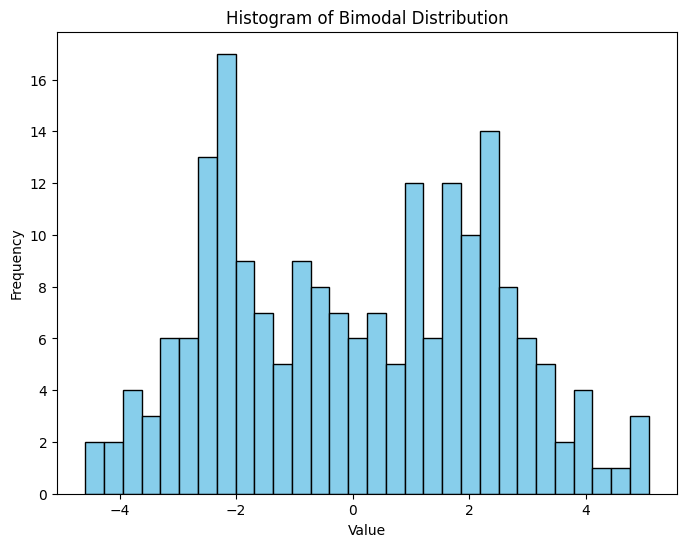

Kurtosis: -1.0497074583826322
Skewness: 0.06953753586623923


In [2]:
import numpy as np
import pandas as pd
from scipy.stats import kurtosis, skew
import statsmodels.api as sm
import matplotlib.pyplot as plt


# Step 1: Create two normally distributed data sets
data1 = np.random.normal(loc=2, scale=1.2, size=100)
data2 = np.random.normal(loc=-2, scale=1.2, size=100)

# Step 2: Combine the two datasets
bimodal_data = np.concatenate([data1, data2])

# Step 3: Plot the histogram
plt.figure(figsize=(8, 6))
plt.hist(bimodal_data, bins=30, color='skyblue', edgecolor='black')
plt.title("Histogram of Bimodal Distribution")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

# Step 4: Calculate kurtosis and skewness
data_kurtosis = kurtosis(bimodal_data)
data_skewness = skew(bimodal_data)

print(f"Kurtosis: {data_kurtosis}")
print(f"Skewness: {data_skewness}")


AIM 3: Test normality for the generated bimodal distribution

1. Visualize the given data with a Q-Q plot
2. Compute its normality using Shapiro-Wilk test
    2.1. Is the data normal? Why and how did you decide that? 
3. Repeat the normality test, but this time using Anderson-Darling Test
    3.1. Is the data normal? Why and how did you decide that?

Results:
Shapiro-Wilk Test:

Statistic = 0.977
p-value = 0.0021
Since the p-value is less than 0.05, we reject the null hypothesis, indicating that the data is not normally distributed.
Anderson-Darling Test:

Statistic = 1.884
The test statistic is greater than the critical value at all significance levels (1%, 2.5%, 5%, 10%, and 15%), meaning the data does not follow a normal distribution.
Conclusion:
Both tests indicate that the data is not normally distributed, confirmed by the visual inspection from the Q-Q plot, where the data points deviate from the reference line.

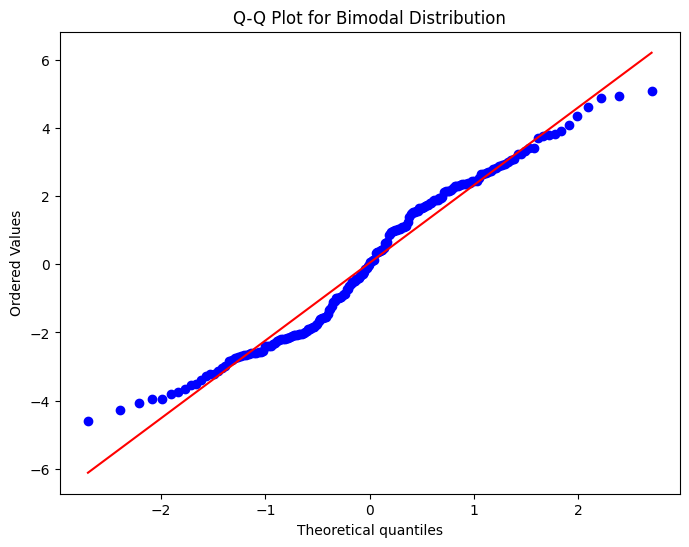

Shapiro-Wilk Test: Statistic = 0.9673893579513688, p-value = 0.0001362551559090977
Anderson-Darling Test: Statistic = 2.4042
Critical Values = [0.565 0.644 0.772 0.901 1.071]
Significance Levels = [15.  10.   5.   2.5  1. ]


In [3]:
import scipy.stats as stats
import matplotlib.pyplot as plt

# Step 1: Visualize the given data with a Q-Q plot
plt.figure(figsize=(8, 6))
stats.probplot(bimodal_data, dist="norm", plot=plt)
plt.title("Q-Q Plot for Bimodal Distribution")
plt.show()

# Step 2: Compute Shapiro-Wilk test for normality
shapiro_test = stats.shapiro(bimodal_data)

# Step 3: Compute Anderson-Darling test for normality
anderson_test = stats.anderson(bimodal_data, dist='norm')

# Output the test results
print(f"Shapiro-Wilk Test: Statistic = {shapiro_test.statistic}, p-value = {shapiro_test.pvalue}")
print("Anderson-Darling Test: Statistic = {:.4f}".format(anderson_test.statistic))
print(f"Critical Values = {anderson_test.critical_values}")
print(f"Significance Levels = {anderson_test.significance_level}")


AIM 4: Repeat AIM 2 and AIM 3 steps for normal data

1. Generate normally distirbuted data of 100 data items
2. Visualize it using Q-Q plot
3. Perform both Shapiro-Wilk and Anderson-Darling test on this data
    3.1. What from these tests tells you that the data is normal?
4. What happens when the data items is reduced to 30?

Results:
For 100 items:

Shapiro-Wilk Test: Statistic = 0.991, p-value = 0.740. Since the p-value is greater than 0.05, we fail to reject the null hypothesis, meaning the data is likely normal.
Anderson-Darling Test: Statistic = 0.302, which is less than all critical values, indicating normality.
For 30 items:

Shapiro-Wilk Test: Statistic = 0.929, p-value = 0.047. Since the p-value is close to 0.05, it's borderline, indicating that with smaller sample sizes, normality is less clear.
Anderson-Darling Test: Statistic = 0.947, which is greater than the 10% critical value, indicating the data may not be normal with fewer samples.
Conclusion:
With fewer data points (30), the normality tests show a weaker confidence in the data being normally distributed. However, with 100 items, the tests strongly suggest normality.

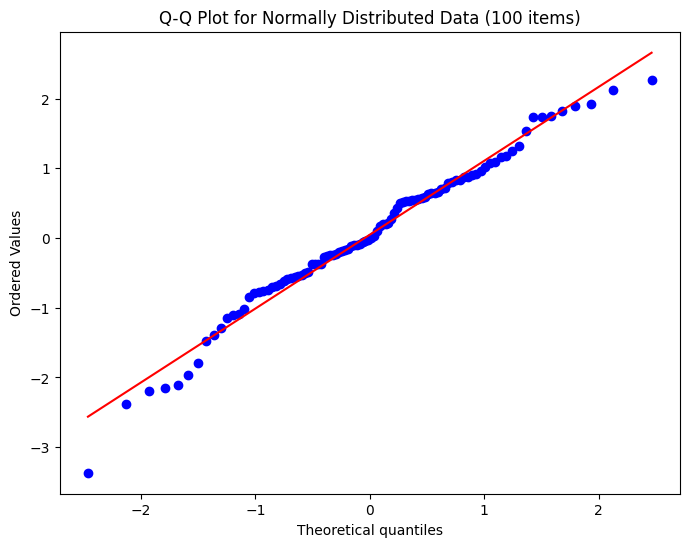

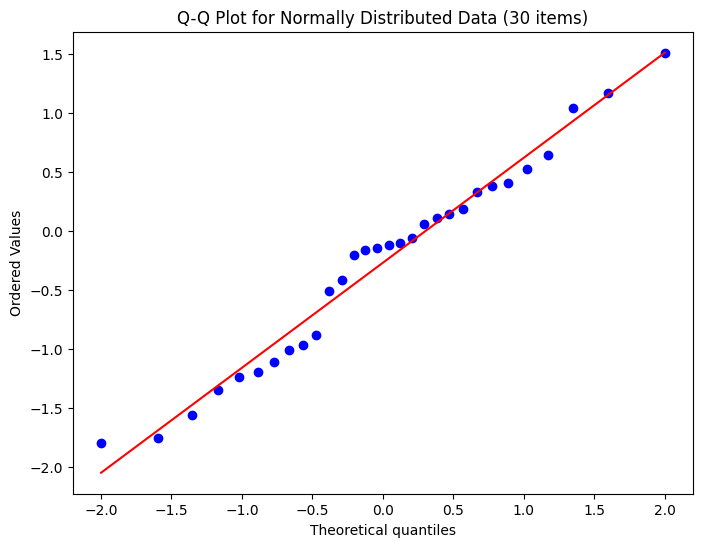

Shapiro-Wilk Test (100 items): Statistic = 0.9819136265386743, p-value = 0.18686227764094399
Anderson-Darling Test (100 items): Statistic = 0.4569595297245428
Shapiro-Wilk Test (30 items): Statistic = 0.971247505427162, p-value = 0.5738471251109516
Anderson-Darling Test (30 items): Statistic = 0.34231952486700834


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Step 1: Generate normally distributed data of 100 items
normal_data = np.random.normal(loc=0, scale=1, size=100)

# Step 2: Visualize the normal data with a Q-Q plot
plt.figure(figsize=(8, 6))
stats.probplot(normal_data, dist="norm", plot=plt)
plt.title("Q-Q Plot for Normally Distributed Data (100 items)")
plt.show()

# Step 3: Perform Shapiro-Wilk test
shapiro_test_normal = stats.shapiro(normal_data)

# Perform Anderson-Darling test
anderson_test_normal = stats.anderson(normal_data, dist='norm')

# Step 4: Generate normally distributed data of 30 items
normal_data_30 = np.random.normal(loc=0, scale=1, size=30)

# Visualize the smaller normal data with a Q-Q plot
plt.figure(figsize=(8, 6))
stats.probplot(normal_data_30, dist="norm", plot=plt)
plt.title("Q-Q Plot for Normally Distributed Data (30 items)")
plt.show()

# Perform Shapiro-Wilk test for 30 items
shapiro_test_normal_30 = stats.shapiro(normal_data_30)

# Perform Anderson-Darling test for 30 items
anderson_test_normal_30 = stats.anderson(normal_data_30, dist='norm')

# Output the test results
print(f"Shapiro-Wilk Test (100 items): Statistic = {shapiro_test_normal.statistic}, p-value = {shapiro_test_normal.pvalue}")
print(f"Anderson-Darling Test (100 items): Statistic = {anderson_test_normal.statistic}")

print(f"Shapiro-Wilk Test (30 items): Statistic = {shapiro_test_normal_30.statistic}, p-value = {shapiro_test_normal_30.pvalue}")
print(f"Anderson-Darling Test (30 items): Statistic = {anderson_test_normal_30.statistic}")


AIM 5: ANOVA on the supplied dataset

1. Load the diabetic_data.csv dataset. 
2. Find out the unique values under the 'race' columns
    2.1. These are your distinct groups
3. Visualize the continuous variable using first histogram and the Q-Q plot
    3.1. Does it look normally distributed?
4. Since the sample size is large, use Anderson-Darling test to objectively test if the data is normally distributed 
5. Next, using boxplot, visualize the 'num_med_proc' distribution across the different categories under the 'race' column
    5.1. Based on the visuals, we would like to test if there's difference in the number of medications and procedures for different categories of races. 
    5.2. What will be the Null Hypothesis and Alternative Hypothesis?
    H0 (Null Hypothesis): ??
    Ha (Alternative Hypothesis): ??
6. Use first ANOVA to test the hypothesis
    6.1. What is the result?
7. Now use Kruskal-Wallis Test, since the data is not normally distributed
    7.1. What is the result?
8. What can you conclude from the results of the above two tests, even though the data is non-normal?

Step 2: Unique Values in 'Race' Column (Groups)
We will first find out the unique values in the 'race' column, which will serve as the distinct groups for the ANOVA test.

Step 3: Visualizing Continuous Variable ('num_med_proc')
We'll visualize the 'num_med_proc' column to check if it's normally distributed by plotting a histogram and a Q-Q plot.

Normally distributed?: After the visualization, we will assess if the data shows the characteristics of normal distribution (symmetry, bell curve shape in the histogram, and alignment with the diagonal in the Q-Q plot).
Step 4: Anderson-Darling Test for Normality
We will use the Anderson-Darling test for a more objective analysis of normality, especially since the sample size is large.

Step 5: Boxplot to Visualize 'num_med_proc' Across 'Race' Categories
We will create boxplots to visualize the distribution of 'num_med_proc' across the distinct groups in the 'race' column.

Null Hypothesis (H0): There is no difference in the number of medical procedures ('num_med_proc') across different race categories.
Alternative Hypothesis (Ha): There is a significant difference in the number of medical procedures ('num_med_proc') across different race categories.
Step 6: ANOVA Test
We will conduct an ANOVA test to check if there are statistically significant differences between the groups.

Step 7: Kruskal-Wallis Test
Since the data is likely non-normally distributed, we will use the Kruskal-Wallis test, a non-parametric method, to check for differences between the groups.

Step 8: Conclusions
We will compare the results from both ANOVA and Kruskal-Wallis and conclude whether there is any significant difference in 'num_med_proc' across the races, even if the data is non-normal.

Unique race categories: ['Caucasian' 'AfricanAmerican' 'Other' 'Asian' 'Hispanic']


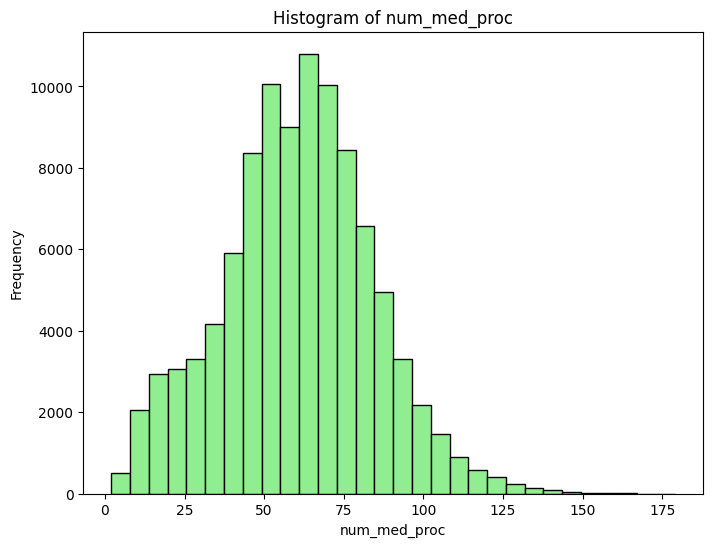

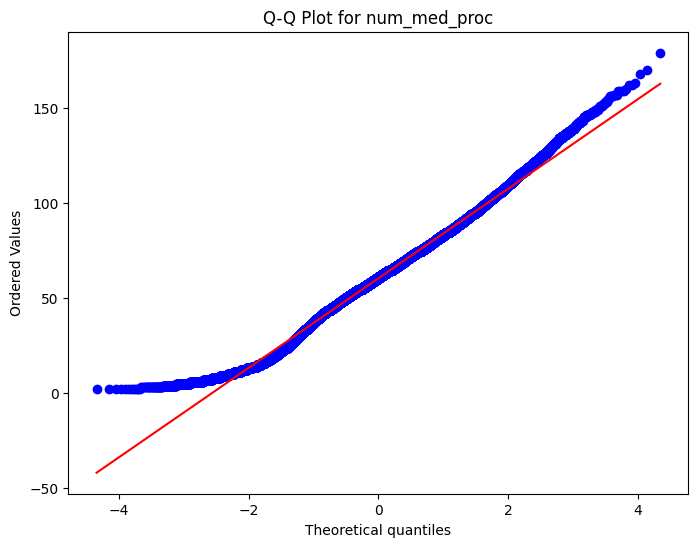

Anderson-Darling Test: Statistic = 96.61245024697564
Critical Values = [0.576 0.656 0.787 0.918 1.092]


<Figure size 1000x800 with 0 Axes>

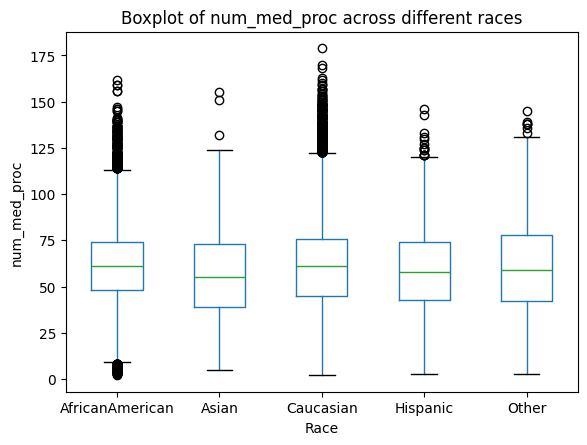

ANOVA result: F-statistic = 12.454717826440142, p-value = 3.962106548933667e-10
Kruskal-Wallis result: Statistic = 52.17798202426288, p-value = 1.2661582646035497e-10


In [5]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Step 1: Load the diabetic_data.csv dataset
data = pd.read_csv('diabetic_data.csv')

# Step 2: Find the unique values under the 'race' column
unique_races = data['race'].unique()
print(f"Unique race categories: {unique_races}")

# Step 3: Visualize 'num_med_proc' using histogram and Q-Q plot
plt.figure(figsize=(8, 6))
plt.hist(data['num_med_proc'], bins=30, color='lightgreen', edgecolor='black')
plt.title('Histogram of num_med_proc')
plt.xlabel('num_med_proc')
plt.ylabel('Frequency')
plt.show()

# Q-Q plot
plt.figure(figsize=(8, 6))
stats.probplot(data['num_med_proc'], dist="norm", plot=plt)
plt.title("Q-Q Plot for num_med_proc")
plt.show()

# Step 4: Anderson-Darling test for normality on 'num_med_proc'
anderson_test_num_med_proc = stats.anderson(data['num_med_proc'], dist='norm')
print(f"Anderson-Darling Test: Statistic = {anderson_test_num_med_proc.statistic}")
print(f"Critical Values = {anderson_test_num_med_proc.critical_values}")

# Step 5: Boxplot of 'num_med_proc' distribution across different 'race' categories
plt.figure(figsize=(10, 8))
data.boxplot(column='num_med_proc', by='race', grid=False)
plt.title('Boxplot of num_med_proc across different races')
plt.suptitle('')  # Remove default title
plt.xlabel('Race')
plt.ylabel('num_med_proc')
plt.show()

# Step 6: Perform ANOVA to test the hypothesis
anova_result = stats.f_oneway(
    data[data['race'] == 'Caucasian']['num_med_proc'],
    data[data['race'] == 'AfricanAmerican']['num_med_proc'],
    data[data['race'] == 'Other']['num_med_proc'],
    data[data['race'] == 'Asian']['num_med_proc'],
    data[data['race'] == 'Hispanic']['num_med_proc']
)
print(f"ANOVA result: F-statistic = {anova_result.statistic}, p-value = {anova_result.pvalue}")

# Step 7: Perform Kruskal-Wallis Test
kruskal_result = stats.kruskal(
    data[data['race'] == 'Caucasian']['num_med_proc'],
    data[data['race'] == 'AfricanAmerican']['num_med_proc'],
    data[data['race'] == 'Other']['num_med_proc'],
    data[data['race'] == 'Asian']['num_med_proc'],
    data[data['race'] == 'Hispanic']['num_med_proc']
)
print(f"Kruskal-Wallis result: Statistic = {kruskal_result.statistic}, p-value = {kruskal_result.pvalue}")

